In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%config Completer.use_jedi = False

In [2]:
sc2=pd.read_csv("/Users/apaulson/repos/Notebooks/ATOM/DILI/DILI_from_nih_computer/TCPL_Database/tcpl_db_temp/sc2.csv")
aenm_map=pd.read_csv("/Users/apaulson/repos/Notebooks/ATOM/DILI/DILI_from_nih_computer/TCPL_Database/tcpl_db_temp/assay_component_endpoint.csv")
aenm_map=dict(zip(aenm_map.aeid, aenm_map.assay_component_endpoint_name))
spid_map = pd.read_csv("/Users/apaulson/repos/Notebooks/ATOM/DILI/DILI_from_nih_computer/TCPL_Database/tcpl_db_temp/sample.csv")
spid_map=dict(zip(spid_map.spid, spid_map.chid))
chems = pd.read_csv("/Users/apaulson/repos/Notebooks/ATOM/DILI/DILI_from_nih_computer/TCPL_Database/tcpl_db_temp/chemical.csv")
chid_map=dict(zip(chems.chid, chems.chnm))
chemlib=pd.read_csv("/Users/apaulson/repos/Notebooks/ATOM/DILI/DILI_from_nih_computer/TCPL_Database/tcpl_db_temp/chemical_library.csv")
print(chemlib.columns, chemlib.shape)
chemlib.clib.value_counts()

Index(['chid', 'clib'], dtype='object') (2703, 2)


/var/folders/h1/vdxppln90rb2qskbcxvx3m5c0000gn/T/ipykernel_77813/4201062582.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  sc2=pd.read_csv("/Users/apaulson/repos/Notebooks/ATOM/DILI/DILI_from_nih_computer/TCPL_Database/tcpl_db_temp/sc2.csv")


clib
APR_MMP           1012
MORGAN             650
SMDC_NEW           504
CHEMBL_TXP_ALL     229
GSK200             200
GSKCRADA           100
CONTROL              8
Name: count, dtype: int64

In [3]:
sc2['chid']=sc2.spid.map(spid_map)
sc2['chnm']=sc2.chid.map(chid_map)
sc2['aenm']=sc2.aeid.map(aenm_map)
sc2.shape

(107814, 14)

In [4]:
aenms=[ 'Cell_Health_1_06H_CellCount_TBMAD_L2FI_DOWN', 'Cell_Health_1_06L_CellCount_TBMAD_L2FI_DOWN', 'Cell_Health_1_24H_CellCount_TBMAD_L2FI_DOWN', 
       'Cell_Health_1_24L_CellCount_TBMAD_L2FI_DOWN', 'Cell_Health_1_06H_MMP_TBMAD_L2FI_DOWN', 'Cell_Health_1_06L_MMP_TBMAD_L2FI_DOWN', 
       'Cell_Health_1_24H_MMP_TBMAD_L2FI_DOWN', 'Cell_Health_1_24L_MMP_TBMAD_L2FI_DOWN', 'Cell_Health_1_06H_MitoStruct_TBMAD_L2FI_DOWN', 
       'Cell_Health_1_06H_MitoStruct_TBMAD_L2FI_UP', 'Cell_Health_1_06L_MitoStruct_TBMAD_L2FI_DOWN', 'Cell_Health_1_06L_MitoStruct_TBMAD_L2FI_UP', 
       'Cell_Health_1_24H_MitoStruct_TBMAD_L2FI_DOWN', 'Cell_Health_1_24H_MitoStruct_TBMAD_L2FI_UP', 'Cell_Health_1_24L_MitoStruct_TBMAD_L2FI_DOWN', 
       'Cell_Health_1_24L_MitoStruct_TBMAD_L2FI_UP', 'Cell_Health_1_06H_NucArea_TBMAD_L2FI_DOWN', 'Cell_Health_1_06H_NucArea_TBMAD_L2FI_UP', 
       'Cell_Health_1_06L_NucArea_TBMAD_L2FI_DOWN', 'Cell_Health_1_06L_NucArea_TBMAD_L2FI_UP', 'Cell_Health_1_24H_NucArea_TBMAD_L2FI_DOWN', 
       'Cell_Health_1_24H_NucArea_TBMAD_L2FI_UP', 'Cell_Health_1_24L_NucArea_TBMAD_L2FI_DOWN', 'Cell_Health_1_24L_NucArea_TBMAD_L2FI_UP', 
       'Cell_Health_1_06H_ROS_TBMAD_L2FI_UP', 'Cell_Health_1_06L_ROS_TBMAD_L2FI_UP', 'Cell_Health_1_24H_ROS_TBMAD_L2FI_UP', 
       'Cell_Health_1_24L_ROS_TBMAD_L2FI_UP', 'Cell_Health_3_06H_GSH_TBMAD_L2FI_DOWN', 'Cell_Health_3_06H_GSH_TBMAD_L2FI_UP', 
       'Cell_Health_3_06L_GSH_TBMAD_L2FI_DOWN', 'Cell_Health_3_06L_GSH_TBMAD_L2FI_UP', 'Cell_Health_3_24H_GSH_TBMAD_L2FI_DOWN', 
       'Cell_Health_3_24H_GSH_TBMAD_L2FI_UP', 'Cell_Health_3_24L_GSH_TBMAD_L2FI_DOWN', 'Cell_Health_3_24L_GSH_TBMAD_L2FI_UP', 
       'Cell_Health_3_06H_NucMask_TBMAD_L2FI_DOWN', 'Cell_Health_3_06H_NucMask_TBMAD_L2FI_UP', 'Cell_Health_3_06L_NucMask_TBMAD_L2FI_DOWN', 
       'Cell_Health_3_06L_NucMask_TBMAD_L2FI_UP', 'Cell_Health_3_24H_NucMask_TBMAD_L2FI_DOWN', 'Cell_Health_3_24H_NucMask_TBMAD_L2FI_UP', 
       'Cell_Health_3_24L_NucMask_TBMAD_L2FI_DOWN', 'Cell_Health_3_24L_NucMask_TBMAD_L2FI_UP', 'MRP3_Txptr_Inhib_3H17bE_uptake', 
       'MRP4_Txptr_Inhib_3HDHEAS_uptake', 'BSEP_Txptr_Inhib_3HTch_uptake', 'NTCP_Txptr_Inhib_3HTch_uptake',]

print(sc2.shape)
sc2 = sc2[sc2.aenm.isin(aenms)]
print(sc2.shape)

sc2.aenm = sc2.aenm.str.replace('Cell_Health_', 'CH')
sc2.aenm = sc2.aenm.str.replace('L2FI_', '')
sc2.aenm = sc2.aenm.str.replace('DOWN', 'DN')

ren={
'MRP3_Txptr_Inhib_3H17bE_uptake' : 'CHT_24H_MRP3_DN',
'MRP4_Txptr_Inhib_3HDHEAS_uptake': 'CHT_24H_MRP4_DN', 
'BSEP_Txptr_Inhib_3HTch_uptake' : 'CHT_24H_BSEP_DN',
'NTCP_Txptr_Inhib_3HTch_uptake' : 'CHT_24H_NTCP_DN',
}
for key, val in ren.items():
    sc2.aenm=sc2.aenm.str.replace(key, val)
sc2.shape

(107814, 14)
(52412, 14)


(52412, 14)

In [5]:
sc2.aenm.unique()

array(['CH1_06L_NucArea_TBMAD_UP', 'CH1_06H_NucArea_TBMAD_UP',
       'CH1_24L_NucArea_TBMAD_UP', 'CH1_24H_NucArea_TBMAD_UP',
       'CH1_06L_ROS_TBMAD_UP', 'CH1_06H_ROS_TBMAD_UP',
       'CH1_24L_ROS_TBMAD_UP', 'CH1_24H_ROS_TBMAD_UP',
       'CH1_06L_MitoStruct_TBMAD_UP', 'CH1_06H_MitoStruct_TBMAD_UP',
       'CH1_24L_MitoStruct_TBMAD_UP', 'CH1_24H_MitoStruct_TBMAD_UP',
       'CH3_06L_NucMask_TBMAD_UP', 'CH3_06H_NucMask_TBMAD_UP',
       'CH3_24L_NucMask_TBMAD_UP', 'CH3_24H_NucMask_TBMAD_UP',
       'CH3_06L_GSH_TBMAD_UP', 'CH3_06H_GSH_TBMAD_UP',
       'CH3_24L_GSH_TBMAD_UP', 'CH3_24H_GSH_TBMAD_UP',
       'CH1_06L_NucArea_TBMAD_DN', 'CH1_06H_NucArea_TBMAD_DN',
       'CH1_24L_NucArea_TBMAD_DN', 'CH1_24H_NucArea_TBMAD_DN',
       'CH1_06L_CellCount_TBMAD_DN', 'CH1_06H_CellCount_TBMAD_DN',
       'CH1_24L_CellCount_TBMAD_DN', 'CH1_24H_CellCount_TBMAD_DN',
       'CH1_06L_MMP_TBMAD_DN', 'CH1_06H_MMP_TBMAD_DN',
       'CH1_24L_MMP_TBMAD_DN', 'CH1_24H_MMP_TBMAD_DN',
       'CH1_06L_Mito

In [6]:
chall=sc2
chall.columns

Index(['s2id', 'aeid', 'spid', 'bmad', 'max_med', 'coff', 'hitc', 'tmpi',
       'created_date', 'modified_date', 'modified_by', 'chid', 'chnm', 'aenm'],
      dtype='object')

In [13]:
chall[chall.aenm=='CHT_24H_MRP4_DN']

,s2id,aeid,spid,bmad,max_med,coff,hitc,tmpi,created_date,modified_date,modified_by,chid,chnm,aenm
107202,108019,2,7,42.581415,26.708884,50.0,0,1,NaN,NaN,root.paulsonak.paulsonak,NaN,NaN,CHT_24H_MRP4_DN
107203,108020,2,87,42.581415,96.077827,50.0,1,2,NaN,NaN,root.paulsonak.paulsonak,NaN,NaN,CHT_24H_MRP4_DN
107204,108021,2,82,42.581415,87.185101,50.0,1,3,NaN,NaN,root.paulsonak.paulsonak,NaN,NaN,CHT_24H_MRP4_DN
107205,108022,2,8,42.581415,99.767878,50.0,1,4,NaN,NaN,root.paulsonak.paulsonak,NaN,NaN,CHT_24H_MRP4_DN
107206,108023,2,99,42.581415,27.592108,50.0,0,5,NaN,NaN,root.paulsonak.paulsonak,NaN,NaN,CHT_24H_MRP4_DN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107401,108218,2,207,42.581415,0.000000,50.0,0,200,NaN,NaN,root.paulsonak.paulsonak,NaN,NaN,CHT_24H_MRP4_DN
107402,108219,2,209,42.581415,105.969120,50.0,1,201,NaN,NaN,root.paulsonak.paulsonak,NaN,NaN,CHT_24H_MRP4_DN
107403,108220,2,210,42.581415,100.000000,50.0,1,202,NaN,NaN,root.paulsonak.paulsonak,NaN,NaN,CHT_24H_MRP4_DN
107404,108221,2,211,42.581415,87.035080,50.0,1,203,NaN,NaN,root.paulsonak.paulsonak,NaN,NaN,CHT_24H_MRP4_DN


In [14]:
mask = chall.pivot_table(index='spid', columns = 'aenm', values='hitc', aggfunc='mean', dropna=False)
mask = mask.sum(axis=1)
mask = mask>0
mask.sum()

525

In [26]:
chpiv = chall.pivot_table(index='spid', columns = 'aenm', values='hitc', aggfunc='mean', dropna=True)
# chpiv=chpiv[mask]
print(chpiv.shape)
chpiv.columns

(1378, 48)


Index(['CH1_06H_CellCount_TBMAD_DN', 'CH1_06H_MMP_TBMAD_DN',
       'CH1_06H_MitoStruct_TBMAD_DN', 'CH1_06H_MitoStruct_TBMAD_UP',
       'CH1_06H_NucArea_TBMAD_DN', 'CH1_06H_NucArea_TBMAD_UP',
       'CH1_06H_ROS_TBMAD_UP', 'CH1_06L_CellCount_TBMAD_DN',
       'CH1_06L_MMP_TBMAD_DN', 'CH1_06L_MitoStruct_TBMAD_DN',
       'CH1_06L_MitoStruct_TBMAD_UP', 'CH1_06L_NucArea_TBMAD_DN',
       'CH1_06L_NucArea_TBMAD_UP', 'CH1_06L_ROS_TBMAD_UP',
       'CH1_24H_CellCount_TBMAD_DN', 'CH1_24H_MMP_TBMAD_DN',
       'CH1_24H_MitoStruct_TBMAD_DN', 'CH1_24H_MitoStruct_TBMAD_UP',
       'CH1_24H_NucArea_TBMAD_DN', 'CH1_24H_NucArea_TBMAD_UP',
       'CH1_24H_ROS_TBMAD_UP', 'CH1_24L_CellCount_TBMAD_DN',
       'CH1_24L_MMP_TBMAD_DN', 'CH1_24L_MitoStruct_TBMAD_DN',
       'CH1_24L_MitoStruct_TBMAD_UP', 'CH1_24L_NucArea_TBMAD_DN',
       'CH1_24L_NucArea_TBMAD_UP', 'CH1_24L_ROS_TBMAD_UP',
       'CH3_06H_GSH_TBMAD_DN', 'CH3_06H_GSH_TBMAD_UP',
       'CH3_06H_NucMask_TBMAD_DN', 'CH3_06H_NucMask_TBMAD_UP',


In [27]:
data = chpiv[['CHT_24H_MRP3_DN','CHT_24H_MRP4_DN','CHT_24H_BSEP_DN','CHT_24H_NTCP_DN',]]
# data = data / np.mean(data)
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

chpiv[['CHT_24H_MRP3_DN','CHT_24H_MRP4_DN','CHT_24H_BSEP_DN','CHT_24H_NTCP_DN',]] = data
chpiv = chpiv.round(2)

chpiv=chpiv.fillna(chpiv.mean().mean())

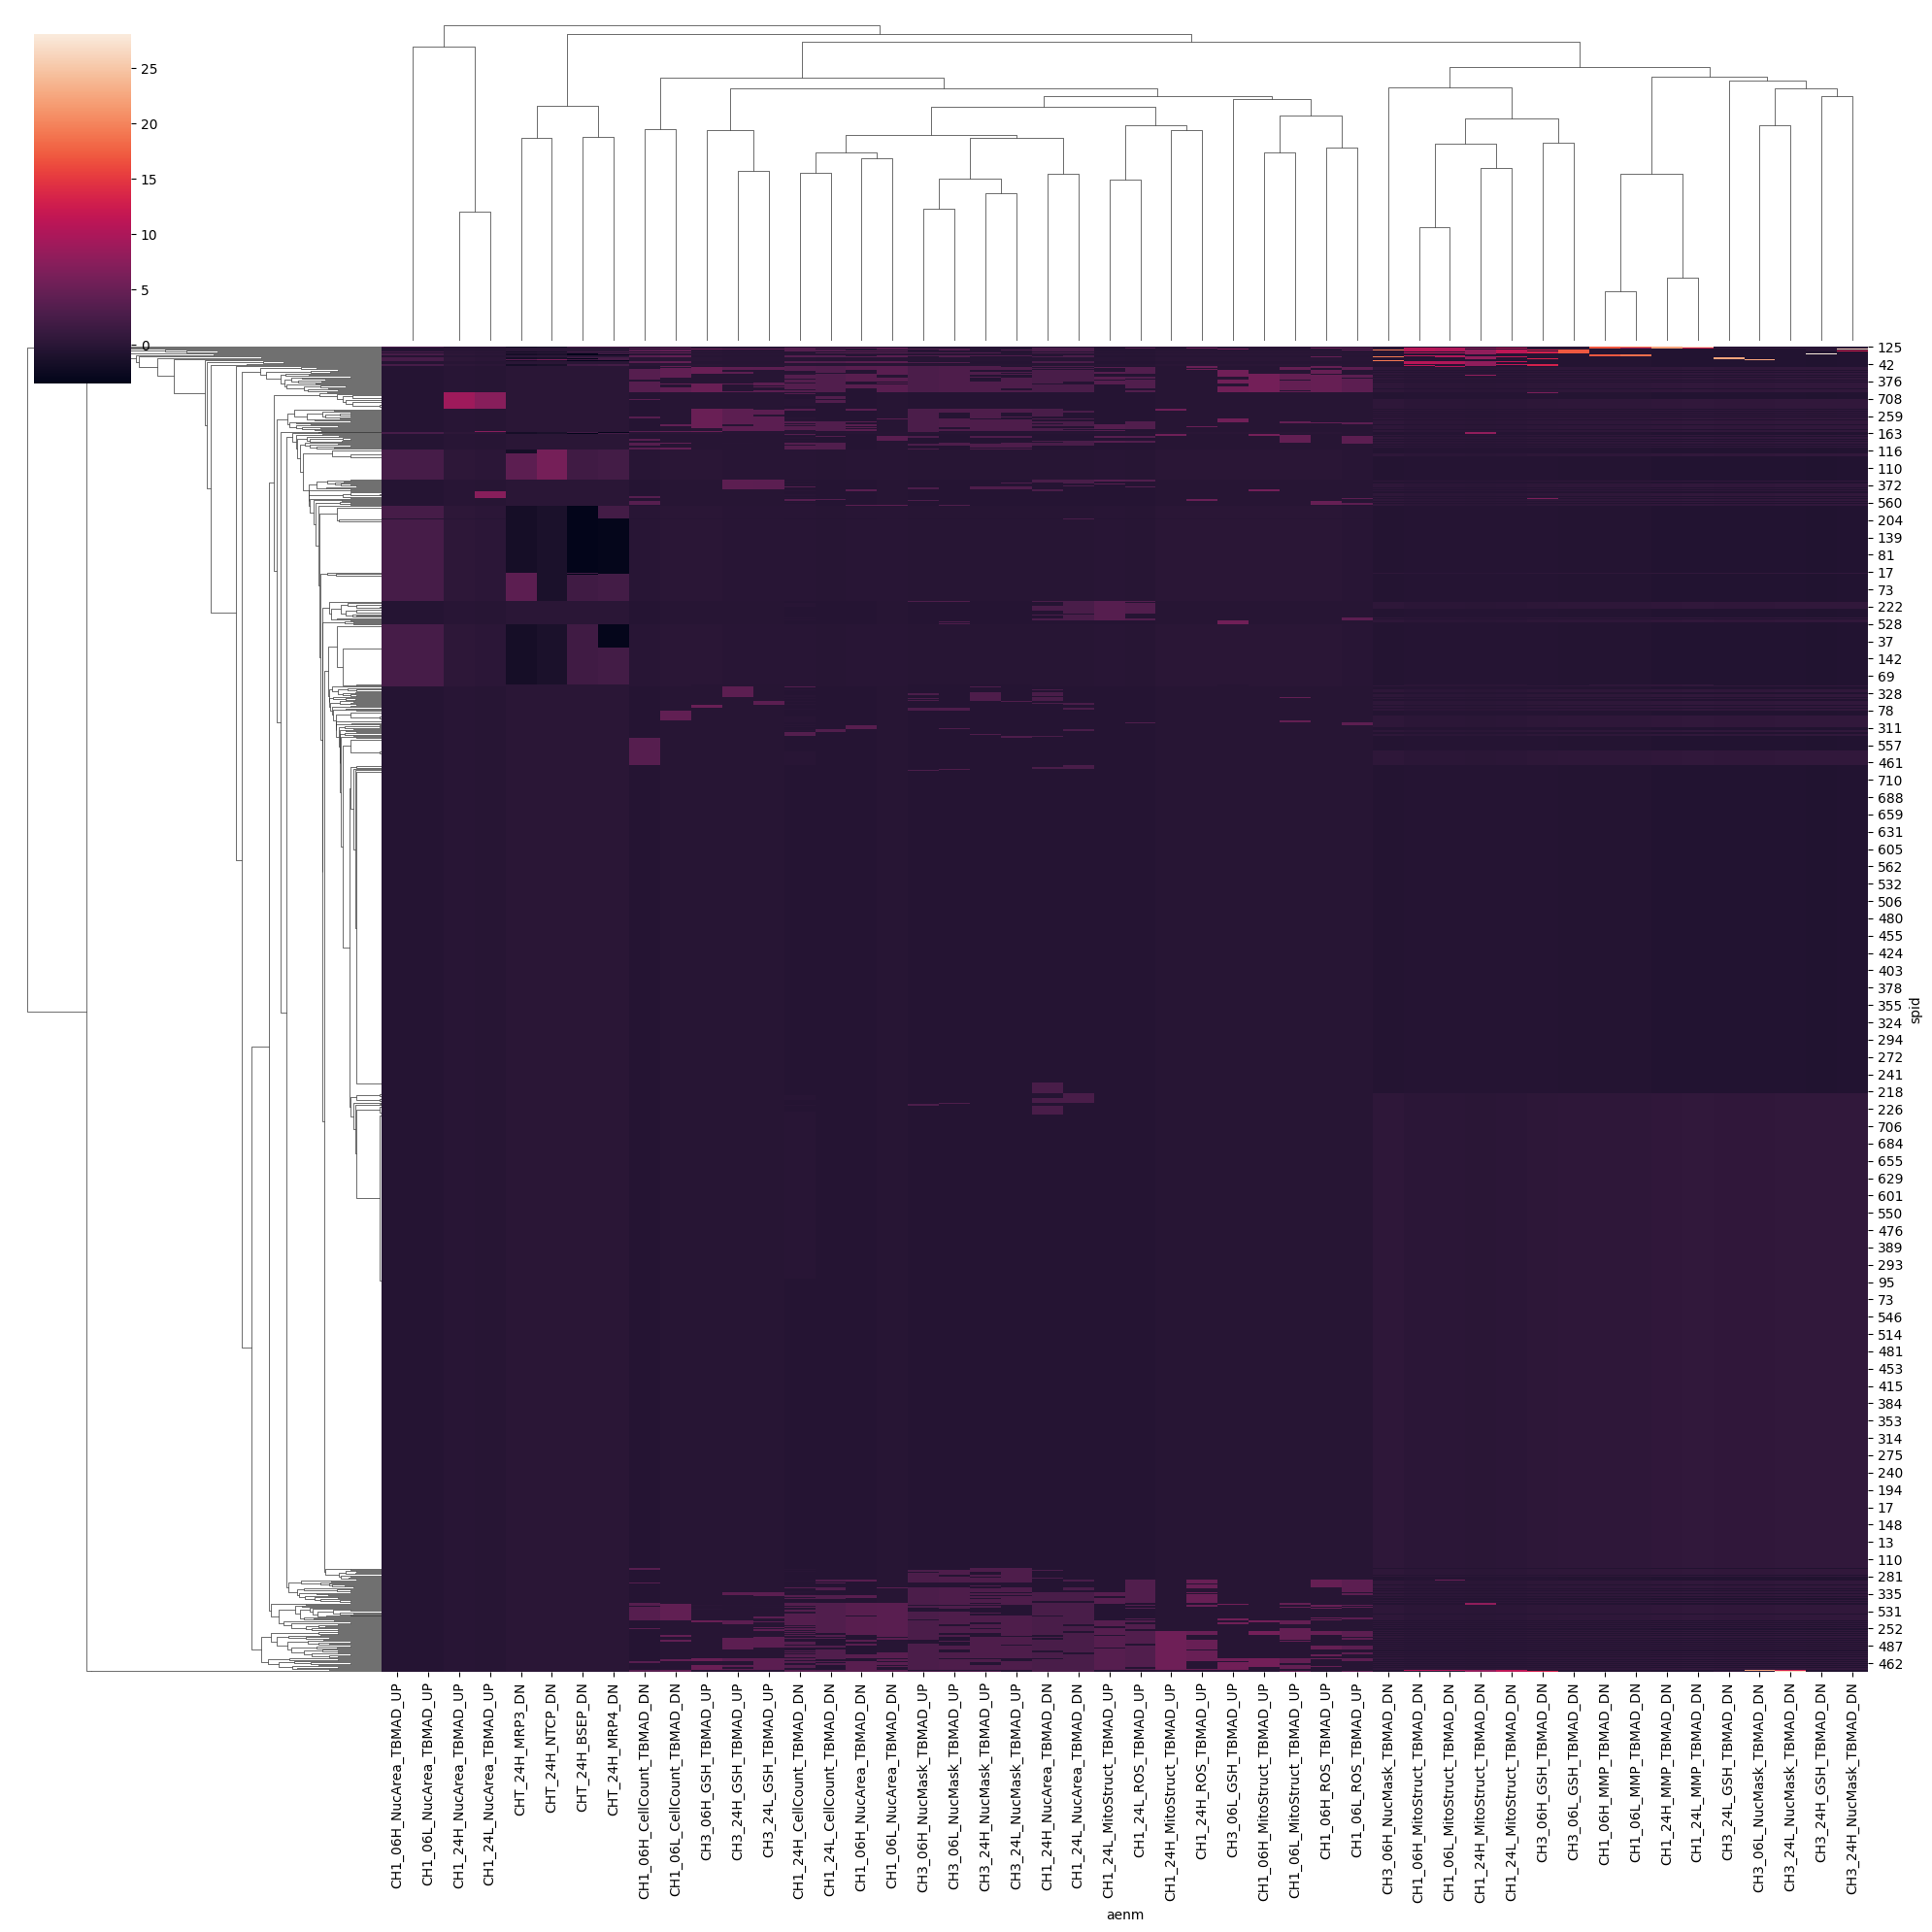

In [28]:
sns.clustermap(chpiv, figsize=(20,20), z_score=1, standard_scale=None)

In [22]:
chpiv = chpiv.reset_index()
chpiv = chpiv.reset_index()

In [23]:
chpiv

aenm,index,spid,CH1_06H_CellCount_TBMAD_DN,CH1_06H_MMP_TBMAD_DN,CH1_06H_MitoStruct_TBMAD_DN,CH1_06H_MitoStruct_TBMAD_UP,CH1_06H_NucArea_TBMAD_DN,CH1_06H_NucArea_TBMAD_UP,CH1_06H_ROS_TBMAD_UP,CH1_06L_CellCount_TBMAD_DN,...,CH3_24H_NucMask_TBMAD_DN,CH3_24H_NucMask_TBMAD_UP,CH3_24L_GSH_TBMAD_DN,CH3_24L_GSH_TBMAD_UP,CH3_24L_NucMask_TBMAD_DN,CH3_24L_NucMask_TBMAD_UP,CHT_24H_BSEP_DN,CHT_24H_MRP3_DN,CHT_24H_MRP4_DN,CHT_24H_NTCP_DN
0,0,7,0.10,0.16,0.04,0.10,0.10,0.10,0.10,0.10,...,-0.01,0.10,-0.30,0.10,-0.01,0.10,2.05,0.88,0.64,-2.57
1,1,8,0.10,0.08,0.08,0.10,0.10,0.10,0.10,0.10,...,0.11,0.10,-0.25,0.10,-0.35,0.10,3.88,3.37,3.54,5.92
2,2,9,0.10,-1.10,-0.72,0.10,0.10,0.10,0.10,0.10,...,-1.46,0.10,1.00,0.10,-1.46,0.10,1.99,1.40,2.98,-1.76
3,3,10,0.10,0.07,0.18,0.10,0.10,0.10,0.10,0.10,...,0.10,0.10,0.10,0.10,0.14,0.10,0.14,-0.41,-0.37,-0.31
4,4,11,0.10,0.07,0.15,0.10,0.10,0.10,0.10,0.10,...,0.28,0.10,0.03,0.10,0.24,0.10,2.04,-1.25,0.95,-0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,1373,95,0.07,0.10,0.10,0.06,0.02,-0.02,0.04,0.01,...,0.10,0.25,0.10,0.10,0.10,0.03,-0.30,-0.03,-0.29,-0.05
1374,1374,96,0.02,0.10,0.10,0.07,0.01,-0.01,-0.04,-0.28,...,0.10,-0.23,0.10,0.17,0.10,-0.20,-0.30,-0.03,-0.29,-0.05
1375,1375,97,0.09,0.10,0.10,0.40,0.13,-0.13,0.23,-0.11,...,0.10,-0.16,0.10,0.11,0.10,-0.09,-0.30,-0.03,-0.29,-0.05
1376,1376,98,0.75,0.10,0.10,0.87,0.27,-0.27,1.31,0.37,...,0.10,1.46,0.10,0.64,0.10,1.45,-0.30,-0.03,-0.29,-0.05


In [24]:
chall

,s2id,aeid,spid,bmad,max_med,coff,hitc,tmpi,created_date,modified_date,modified_by,chid,chnm,aenm
40924,41741,73,207,0.068842,-0.019599,0.206527,0,1,NaN,NaN,root.paulsonak.paulsonak,201.0,dimethyl sulfoxide,CH1_06L_NucArea_TBMAD_UP
40925,41742,73,110,0.068842,-0.015588,0.206527,0,2,NaN,NaN,root.paulsonak.paulsonak,108.0,000108_1,CH1_06L_NucArea_TBMAD_UP
40926,41743,73,109,0.068842,-0.017027,0.206527,0,3,NaN,NaN,root.paulsonak.paulsonak,107.0,000107_1,CH1_06L_NucArea_TBMAD_UP
40927,41744,73,111,0.068842,0.101367,0.206527,0,4,NaN,NaN,root.paulsonak.paulsonak,109.0,000109_1,CH1_06L_NucArea_TBMAD_UP
40928,41745,73,7,0.068842,0.013712,0.206527,0,5,NaN,NaN,root.paulsonak.paulsonak,7.0,sb-756050,CH1_06L_NucArea_TBMAD_UP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107809,108626,4,207,47.983733,0.000000,50.000000,0,200,NaN,NaN,root.paulsonak.paulsonak,NaN,NaN,CHT_24H_NTCP_DN
107810,108627,4,209,47.983733,102.400933,50.000000,1,201,NaN,NaN,root.paulsonak.paulsonak,NaN,NaN,CHT_24H_NTCP_DN
107811,108628,4,210,47.983733,95.058186,50.000000,1,202,NaN,NaN,root.paulsonak.paulsonak,NaN,NaN,CHT_24H_NTCP_DN
107812,108629,4,211,47.983733,100.000000,50.000000,1,203,NaN,NaN,root.paulsonak.paulsonak,NaN,NaN,CHT_24H_NTCP_DN


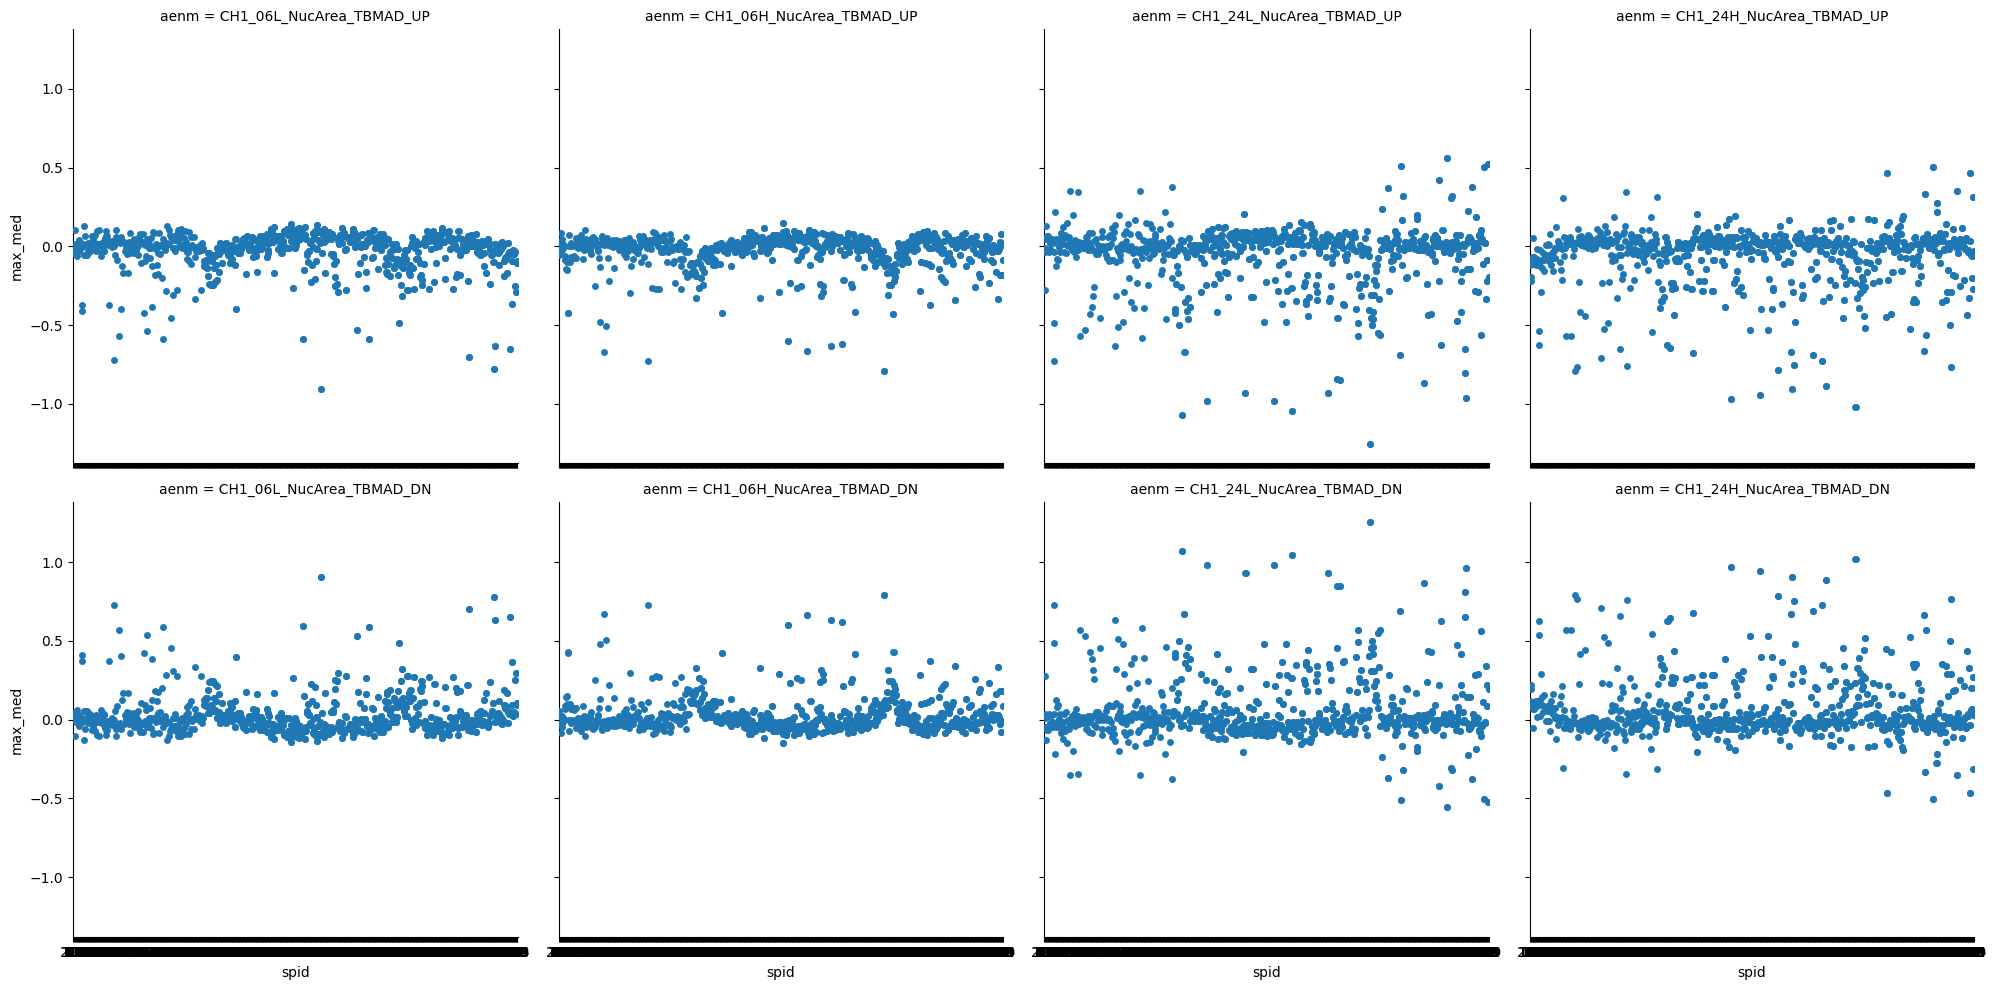

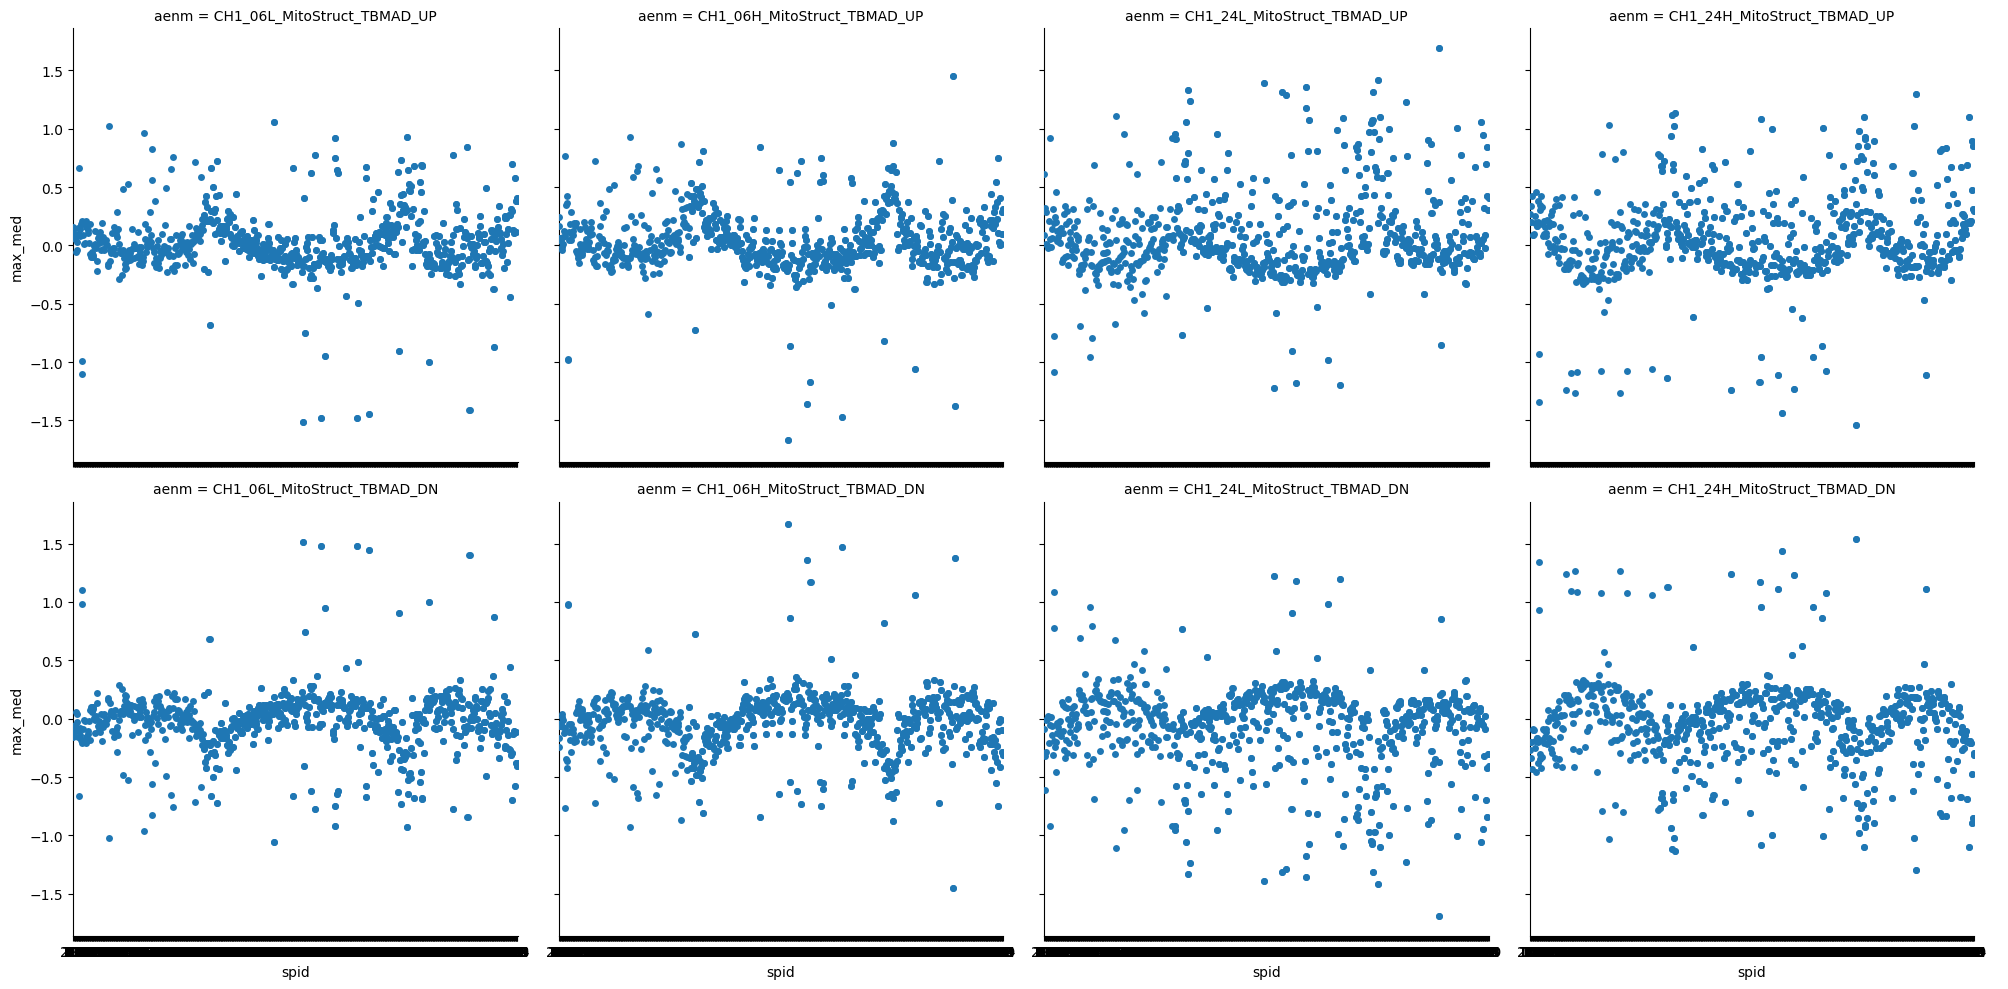

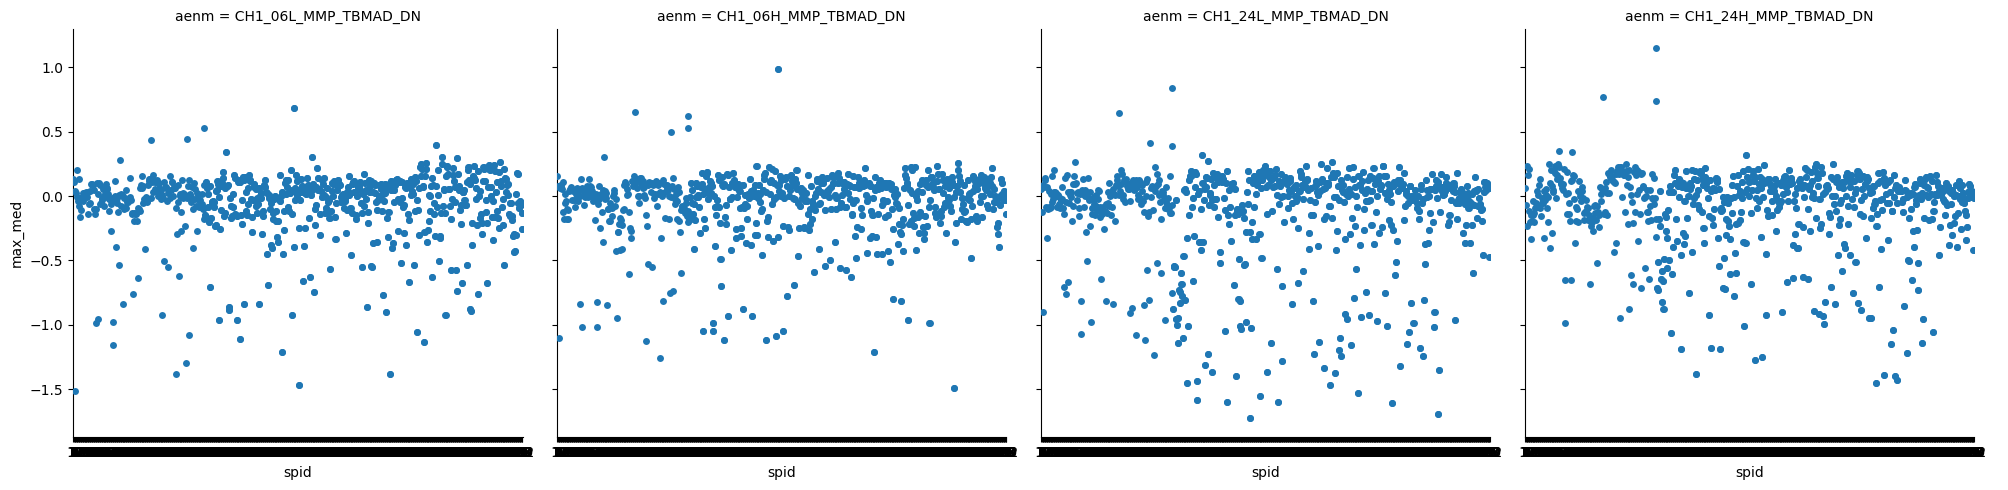

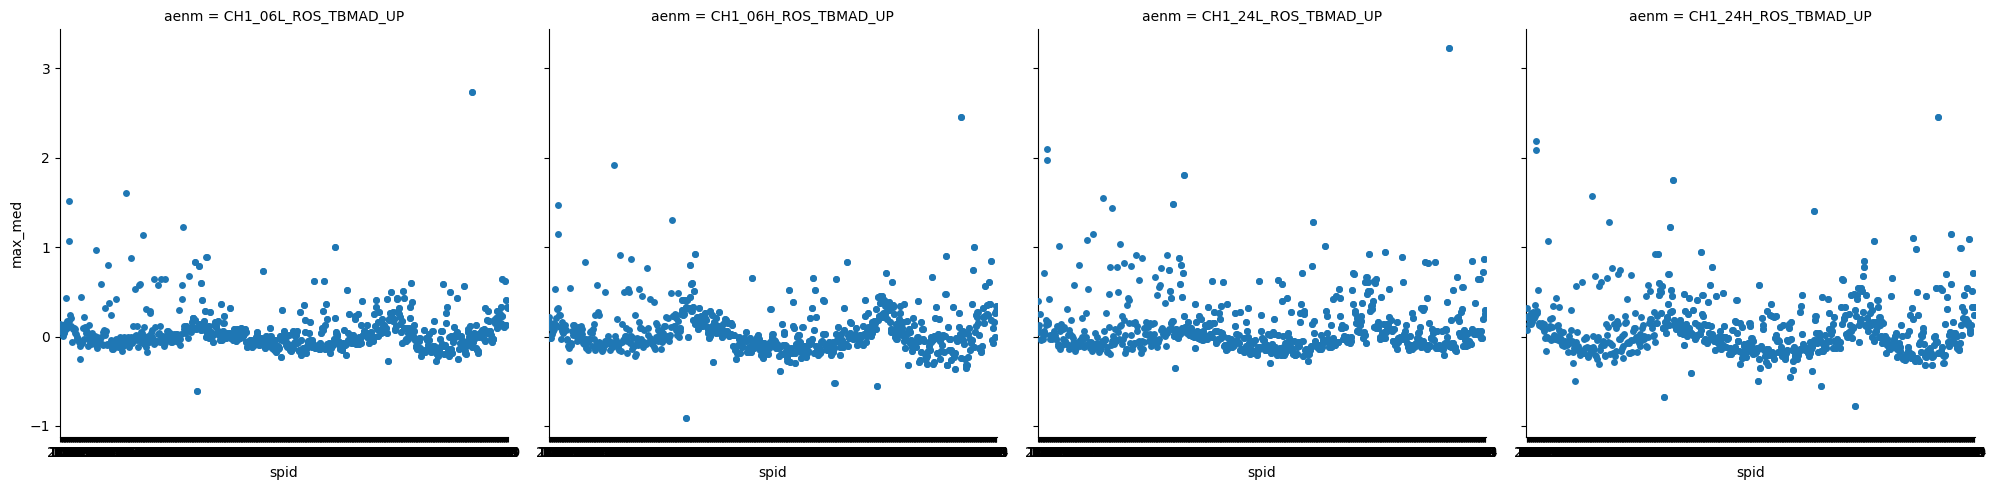

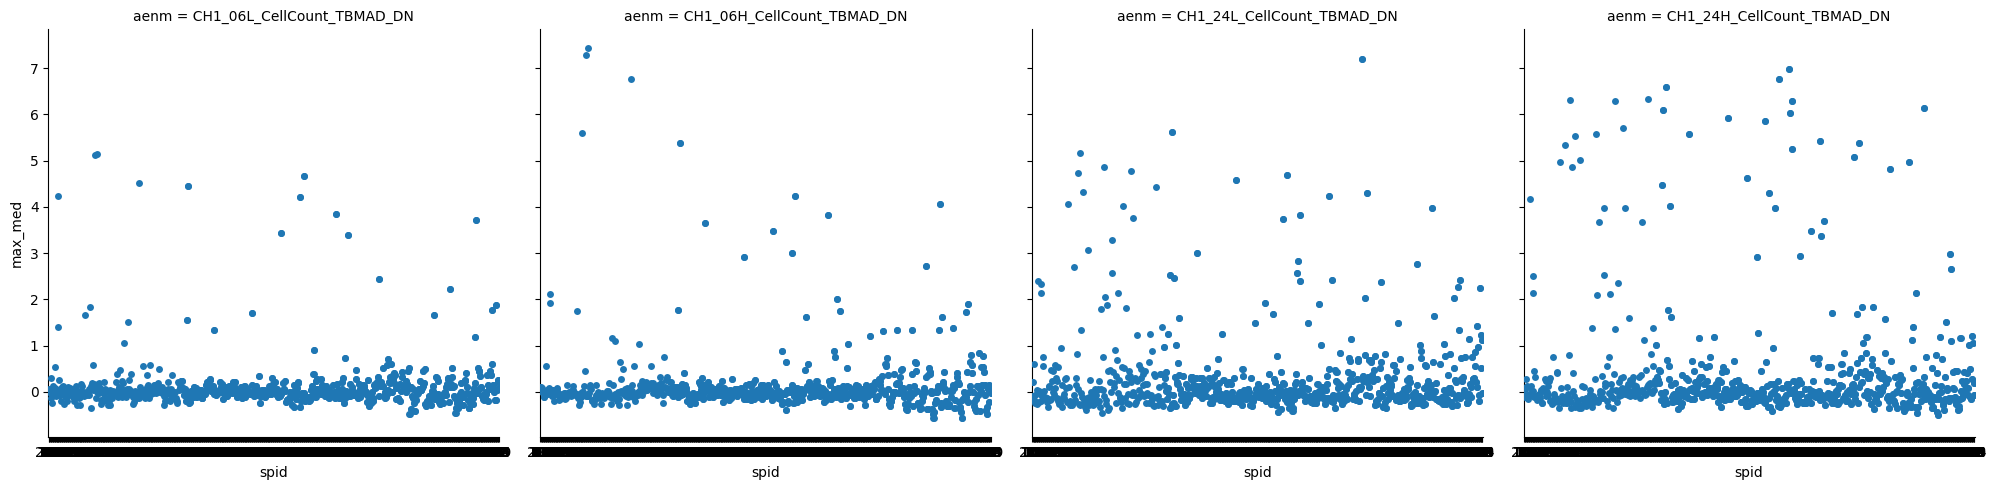

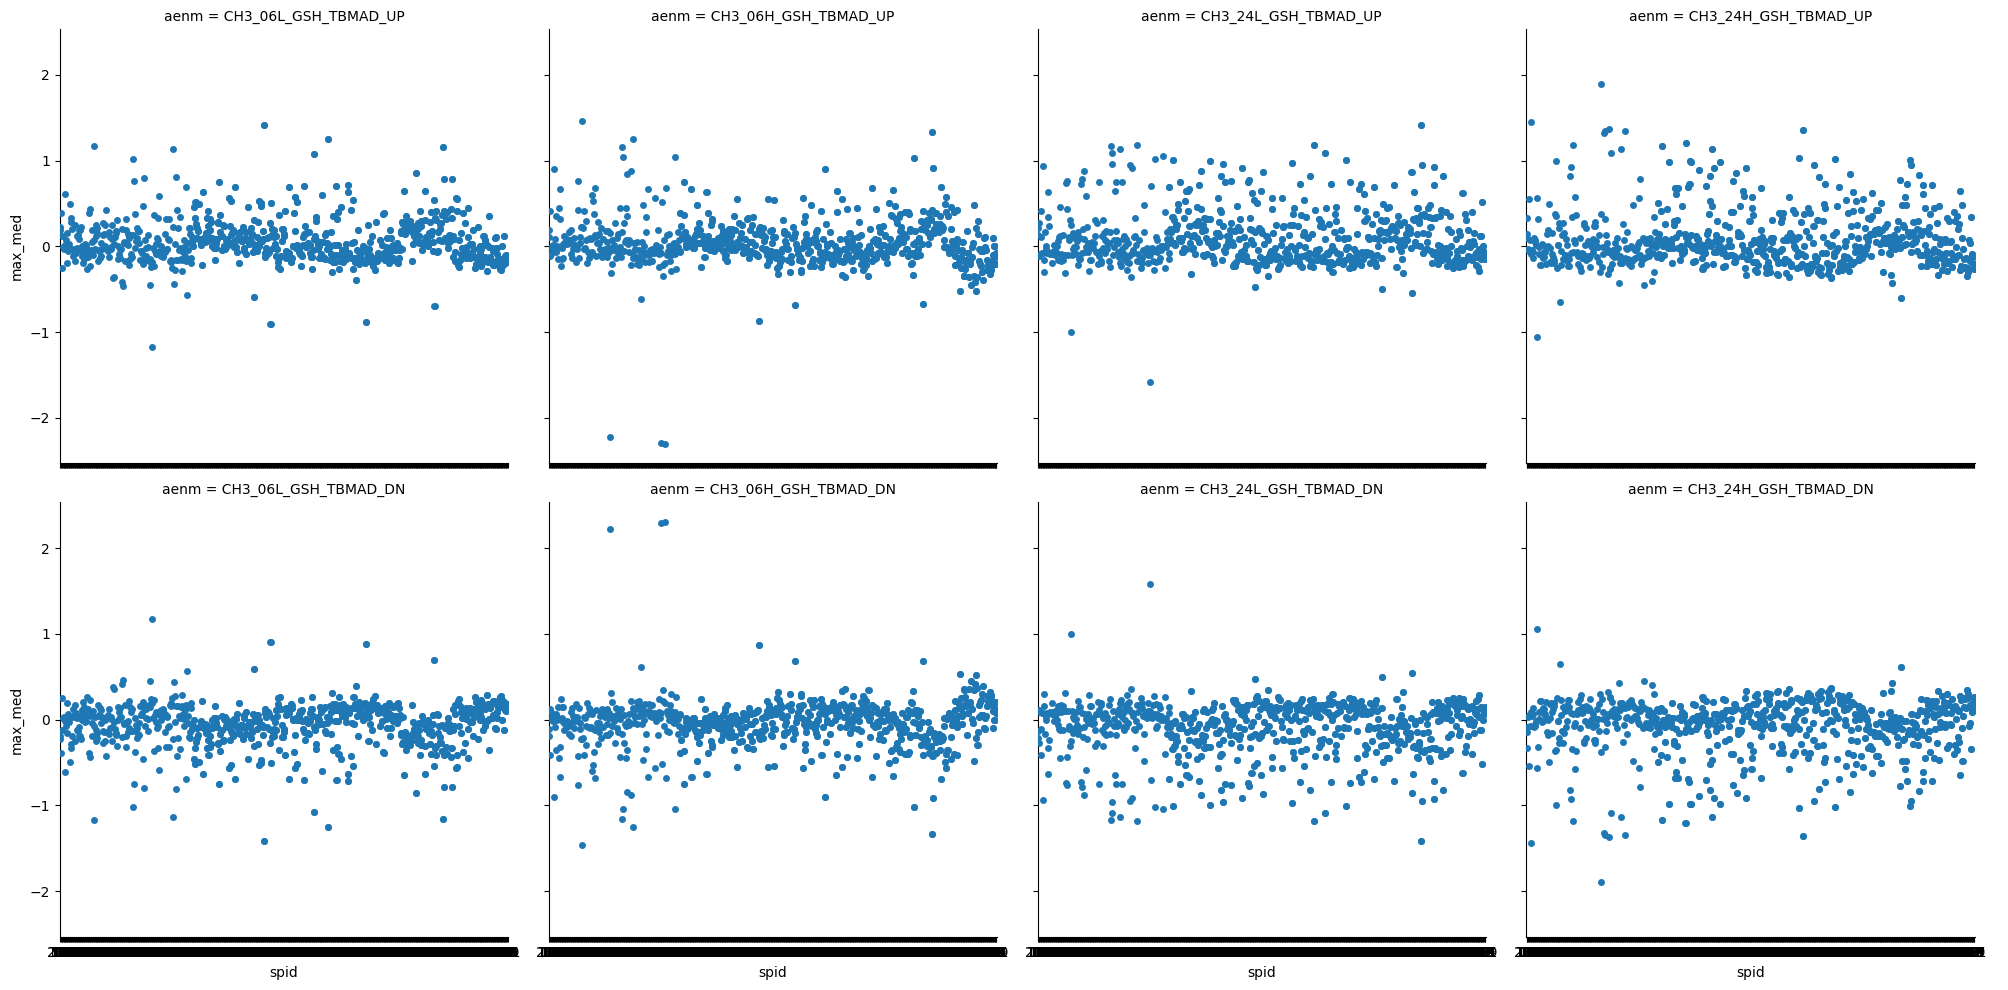

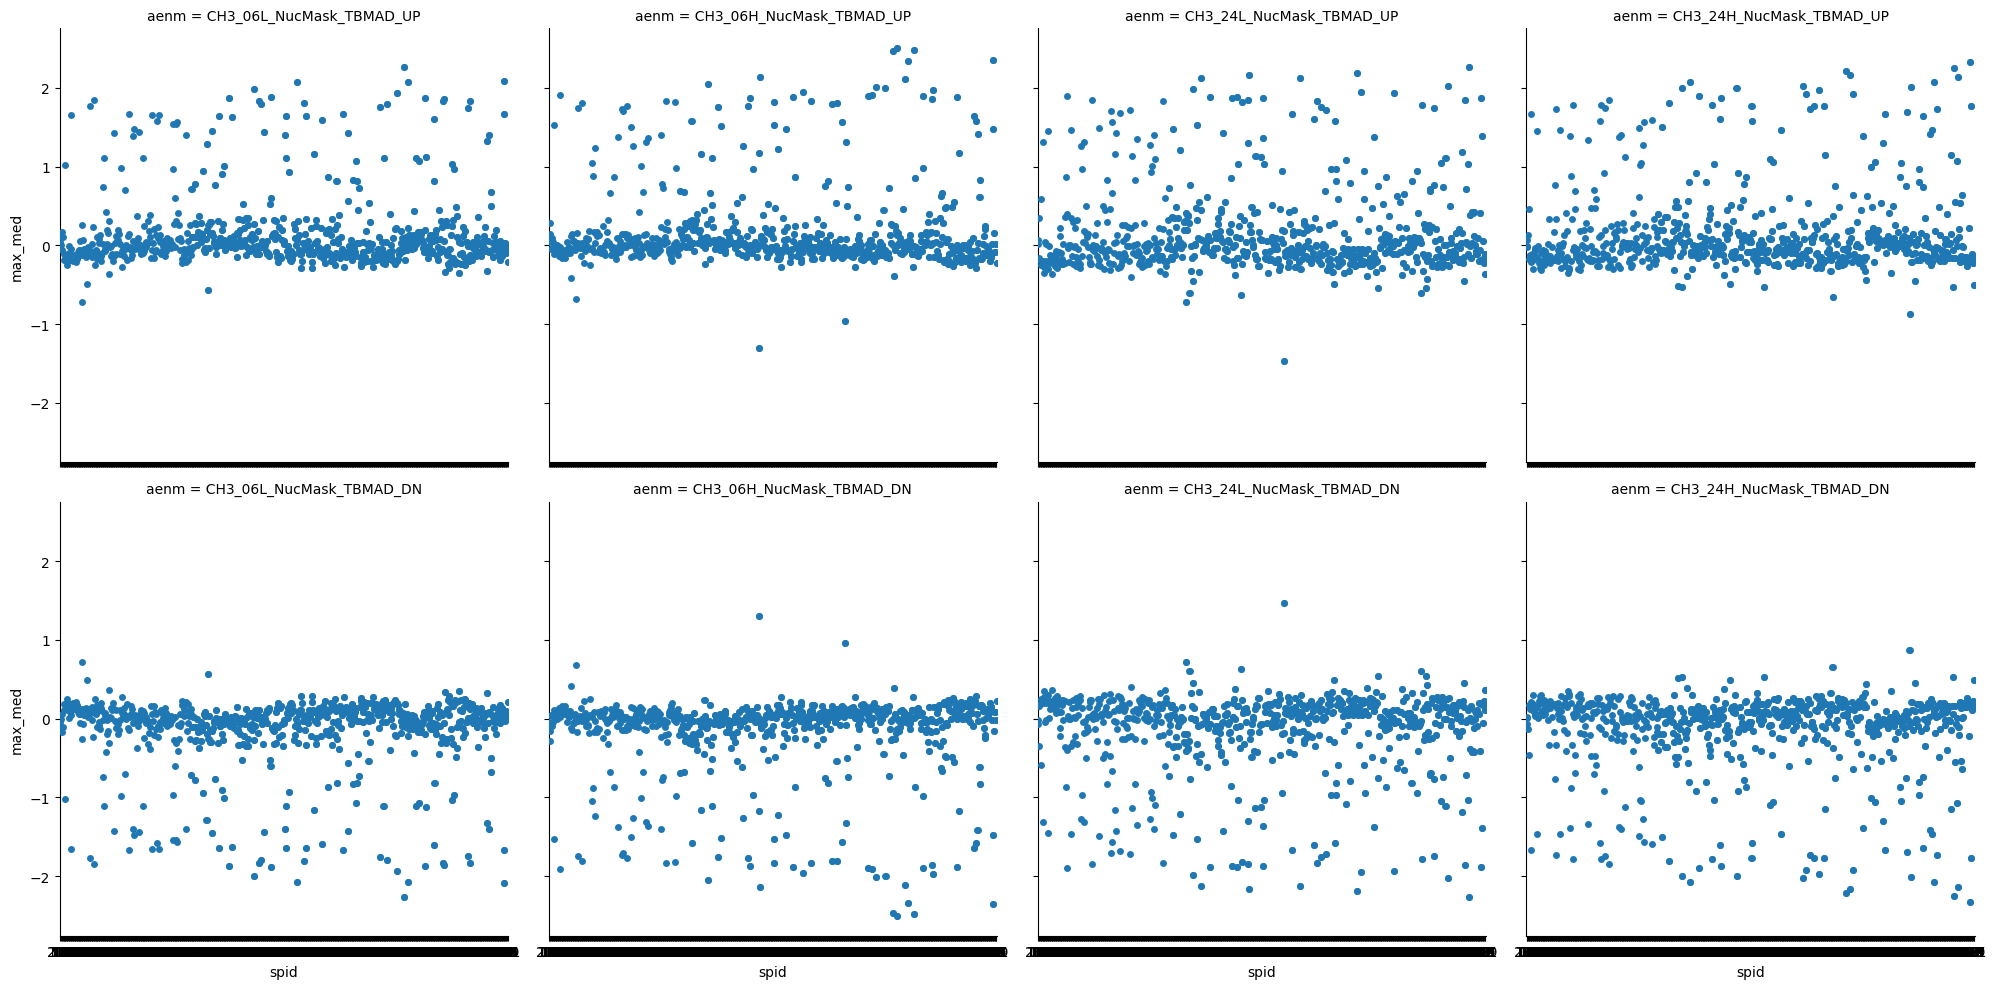

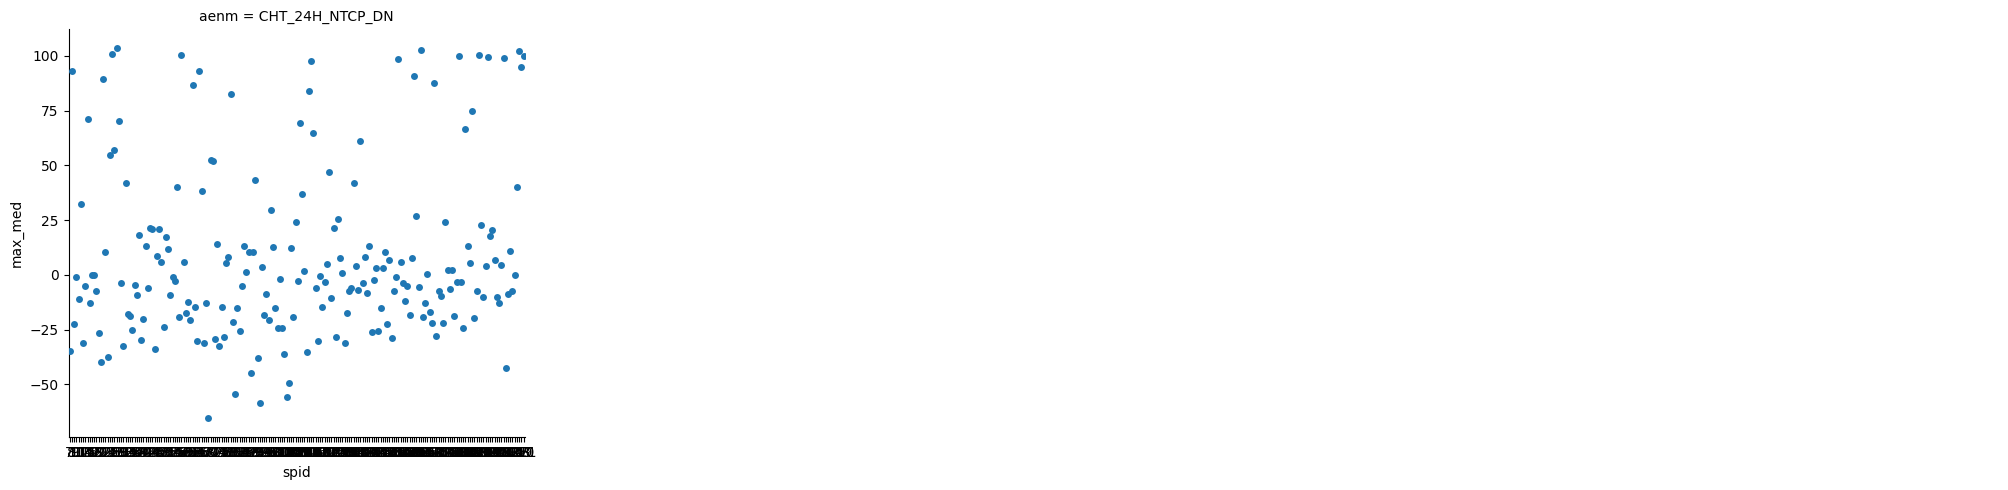

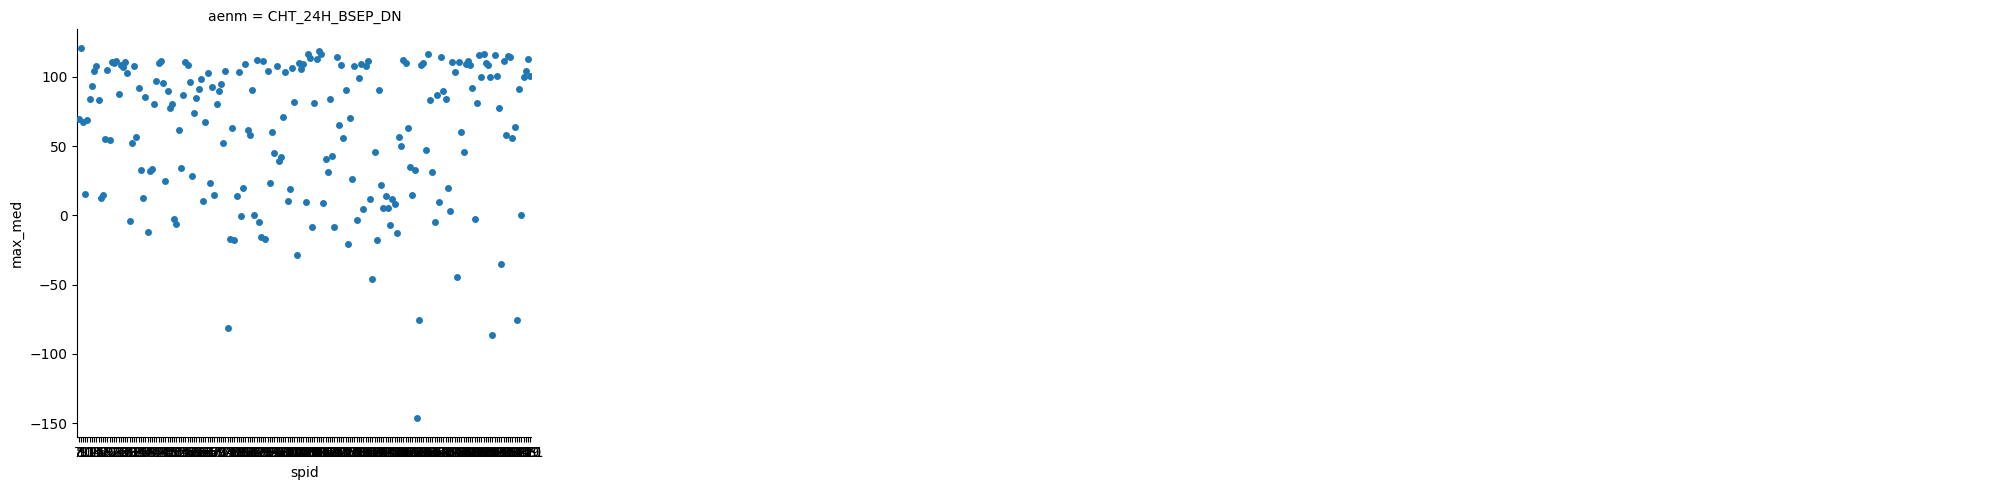

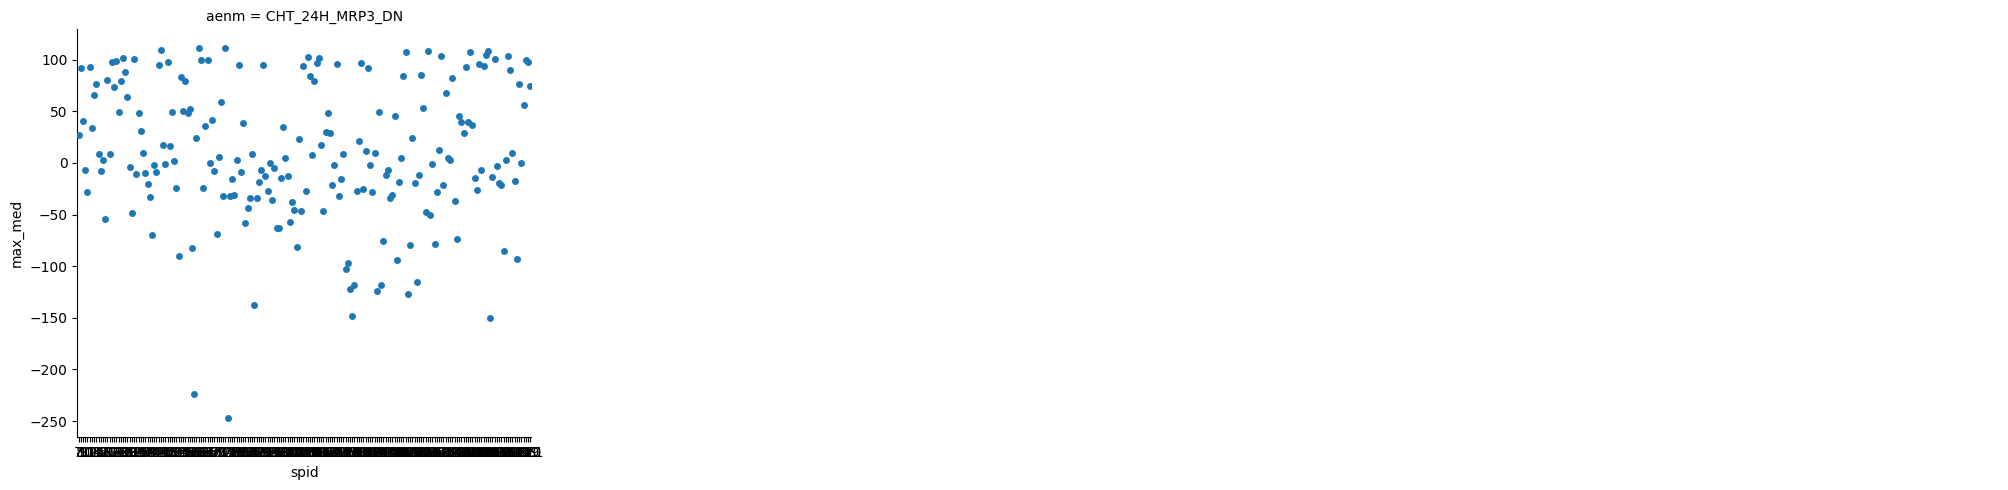

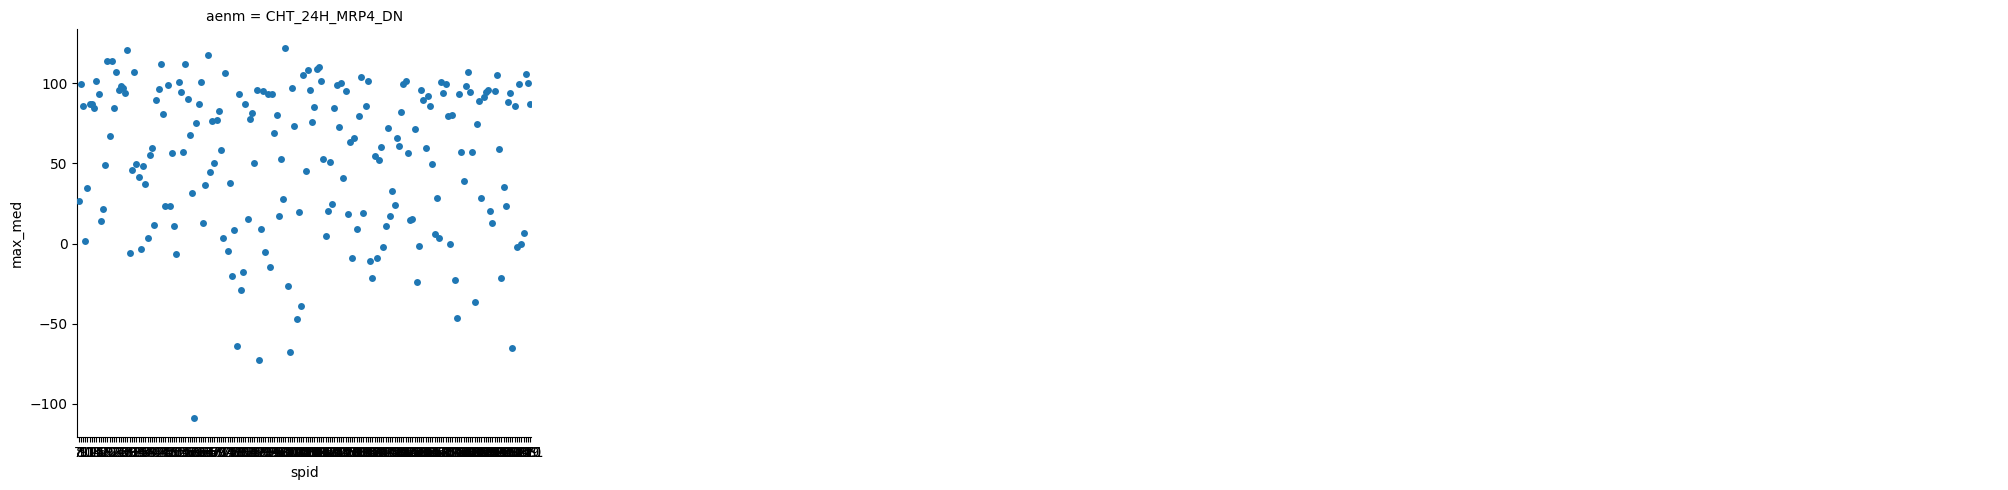

In [30]:
for meas in ['NucArea', 'MitoStruct', 'MMP', 'ROS', 'CellCount', 'GSH', 'NucMask', 'NTCP', 'BSEP', 'MRP3', 'MRP4']:
    sns.catplot(x='spid', y='max_med', hue=None, data=chall[chall.aenm.str.contains(meas)], row=None, col='aenm', col_wrap=4, 
                    # estimator='mean', ci=95, n_boot=1000, units=None, 
                    seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', 
                    height=5, aspect=1, orient=None, color=None, palette=None, legend=True, 
                    legend_out=True, sharex=True, sharey=True, margin_titles=False,)

In [ ]:
chall